In [3]:
#Bai1
import numpy as np
import matplotlib.pyplot as plt
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
color = np.array(["red", "blue","green", "yellow", "pink", "black", "orange", "purple", "cyan", "magenta"])

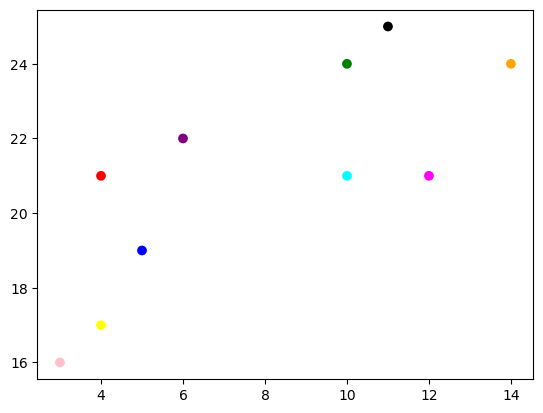

In [4]:
plt.scatter(x, y,c=color)
plt.show()

In [5]:
data = list(zip(x,y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


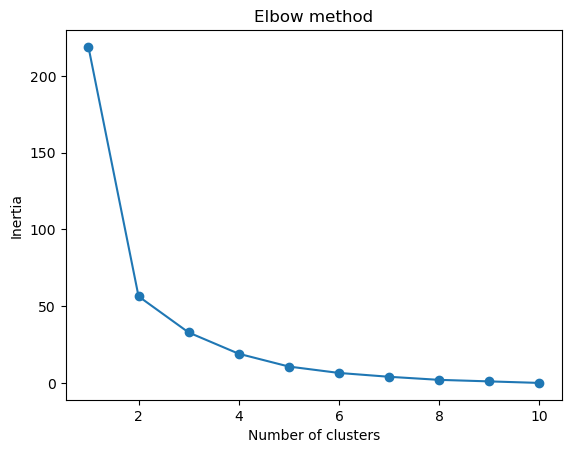

In [6]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


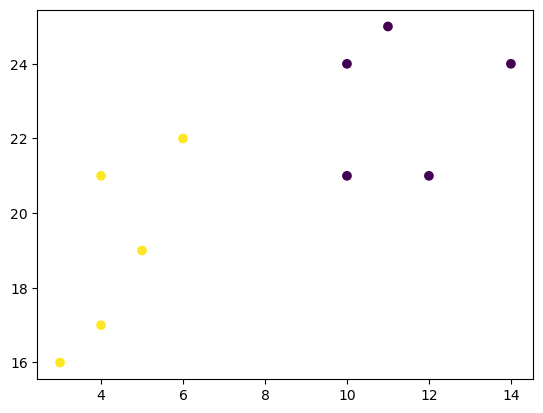

In [8]:
print('centers found by scikit-learn:')
print(kmeans.cluster_centers_)

centers found by scikit-learn:
[[11.4 23. ]
 [ 4.4 19. ]]


In [9]:
#Bai2
import pandas as pd
df = pd.read_csv('housing.csv')
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

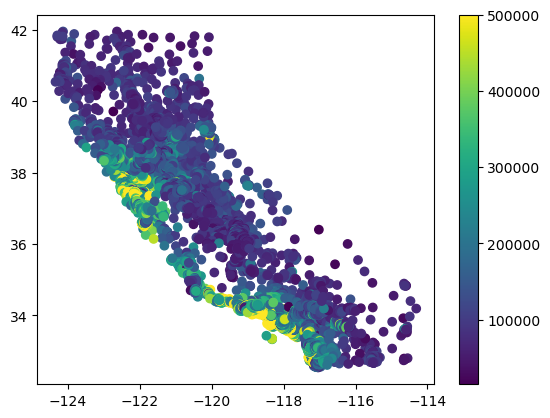

In [10]:
x = df['longitude'].to_numpy()
y = df['latitude'].to_numpy()
color = df['median_house_value'].to_numpy()
plt.scatter(x,y, c=color)
plt.colorbar()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

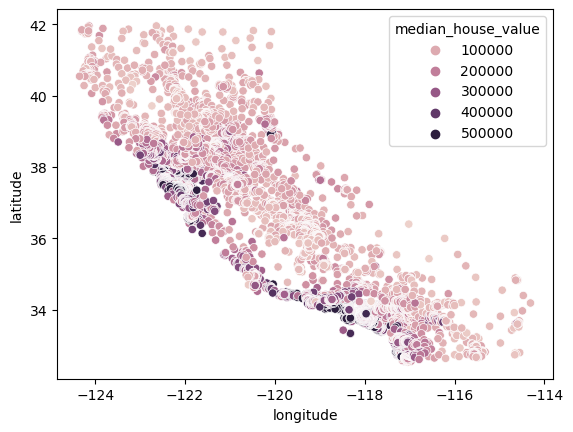

In [11]:
import seaborn as sns
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], df[['median_house_value']], test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(df.shape)

(14448, 2)
(6192, 2)
(20640, 10)


In [13]:
from sklearn import preprocessing
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)
print(x_train_norm.shape)
print(x_test_norm.shape)

(14448, 2)
(6192, 2)


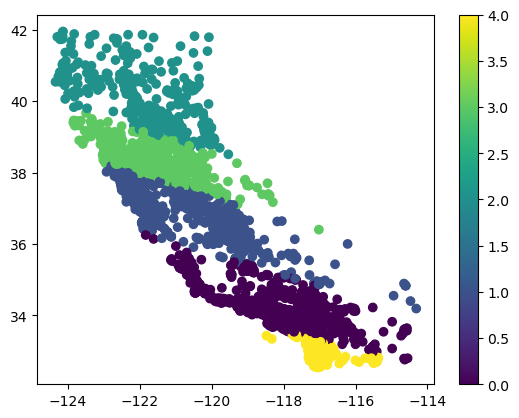

In [14]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init ='auto')
kmeans.fit(x_train_norm)

plt.scatter(x_train['longitude'].to_numpy(), x_train['latitude'].to_numpy(), c=kmeans.labels_)
plt.colorbar()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

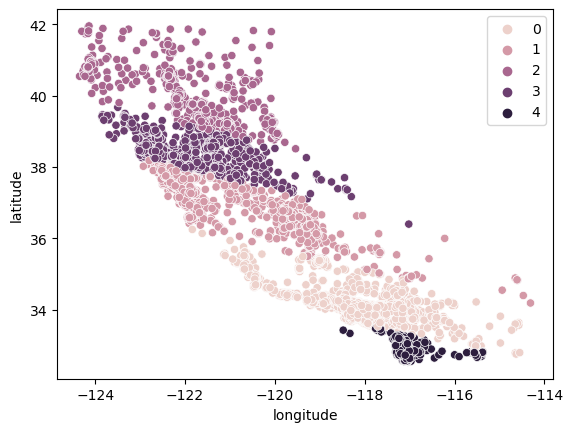

In [15]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

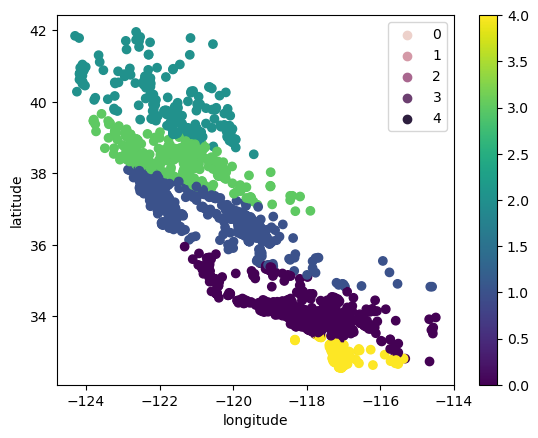

In [16]:
y_pred = kmeans.predict(x_test_norm)
sns.scatterplot(data = x_test, x = 'longitude', y = 'latitude', hue = y_pred)
plt.scatter(x_test['longitude'].to_numpy(), x_test['latitude'].to_numpy(), c=y_pred)
plt.colorbar()
plt.show()

In [17]:
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

Centers found by scikit-learn:
[[ 0.27698887 -0.96087076]
 [ 0.29345769 -0.95596888]
 [ 0.31133094 -0.95029171]
 [ 0.30047293 -0.95378665]
 [ 0.27026045 -0.96278599]]


In [18]:
#Bai3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['latitude', 'longitude']], df[['median_house_value']], test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(df.shape)

(16512, 2)
(4128, 2)
(20640, 10)
